In [1]:
import numpy as np
import scipy
from scipy import signal
import mne
import glob
import csv

In [2]:
local_path = './../../../data/raw/HV/HV1/HV1_F1_L_Removed_ICA.set'


In [3]:
data = mne.io.read_epochs_eeglab(local_path)._data

Extracting parameters from ./../../../data/raw/HV/HV1/HV1_F1_L_Removed_ICA.set...


<ipython-input-3-e0a8228b57c9>:1: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  data = mne.io.read_epochs_eeglab(local_path)._data


56 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


In [4]:
data.shape

(56, 61, 1250)

In [5]:
def log_result(file, name, accuracy, patients_correct, patients_total, set_name, channels, notes):
    writer = csv.writer(file)
    writer.writerow([name, str(accuracy*100) + '%', ' ' + str(patients_correct) + '/' + str(patients_total), set_name, channels, notes])
        

# Apply bandpower to datasets

In [6]:
# Returns relevant datasets (f.e. all right-hand recordings of healthy patients) as a list of np arrays
def get_datasets(patient_type_location, recording_type_expression):
    if recording_type_expression != l_new:
        sets_locations = glob.glob(patient_type_location + recording_type_expression + suffix)
    else:
        sets_locations = glob.glob(patient_type_location + recording_type_expression)
    
    sets = []
    for path in sets_locations: 
        sets.append(mne.io.read_epochs_eeglab(path))
        
    return np.array(np.array([(patient._data) for patient in sets]))

In [7]:
root = './../../../'
suffix = '*.set'

location_healthy = root + 'data/raw/HV/*/'
location_pain = root + 'data/raw/PP/*/'
location_nopain = root + 'data/raw/PnP/*/'

location_pwp = root + 'data_new/raw/PwP/*/'
location_pdp = root + 'data_new/raw/PdP/*/'
location_pnp = root + 'data_new/raw/PnP/*/'


rh = '*_RH*'
lh = '*_LH*'
l_new = '*_L.set'   # NO SUFFIX
l_old = '*_L_*'

sets_healthy_rh = glob.glob(location_pnp + l_new)

sets_healthy_rh

['./../../../data_new/raw/PnP\\PnP_1\\PnP_1_L.set',
 './../../../data_new/raw/PnP\\PnP_3\\PnP_3_L.set',
 './../../../data_new/raw/PnP\\PnP_4\\PnP_4_L.set',
 './../../../data_new/raw/PnP\\PnP_5\\PnP_5_L.set',
 './../../../data_new/raw/PnP\\PnP_7\\PnP_7_L.set',
 './../../../data_new/raw/PnP\\PnP_8\\PnP_8_L.set',
 './../../../data_new/raw/PnP\\PnP_9\\PnP_9_L.set']

In [15]:
pp_rh_raw = get_datasets(location_pain, l_old)
pnp_rh_raw = get_datasets(location_nopain, l_old)

Extracting parameters from ./../../../data/raw/PP\PP1\PP1_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP10\PP10_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP11\PP11_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP2\PP2_F1_L_Removed_ICA.set...
51 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP3\PP3_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


52 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP4\PP4_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP5\PP5_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


55 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP6\PP6_F1_L_Removed_ICA.set...
32 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


Extracting parameters from ./../../../data/raw/PP\PP7\PP7_F1_L_Removed_ICA.set...
52 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PP\PP9\PP9_F1_L_Removed_ICA.set...
54 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP1\PnP1_F1_L_Removed_ICA.set...
50 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP2\PnP2_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP3\PnP3_F1_L_Removed_ICA.set...
41 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP4\PnP4_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP5\PnP5_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


50 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP6\PnP6_F1_L_Removed_ICA.set...
53 matching events found


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP7\PnP7_F01_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


58 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP8\PnP8_F1_L_Removed_ICA.set...
50 matching events found
No baseline correction applied


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


Not setting metadata
0 projection items activated
Ready.
Extracting parameters from ./../../../data/raw/PnP\PnP9\PnP9_F1_L_Removed_ICA.set...


<ipython-input-6-ca455454a3e4>:10: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  sets.append(mne.io.read_epochs_eeglab(path))


55 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


In [16]:
pp_rh_raw

array([array([[[-1.10309505e-06, -1.22919893e-06, -1.04390240e-06, ...,
          4.83999580e-07,  4.48858857e-07,  5.28127968e-07],
        [-1.04978062e-07, -8.19632053e-07, -1.52126229e-06, ...,
          7.20147669e-07,  8.47492158e-07,  1.05488002e-06],
        [ 1.93372101e-07,  6.16806149e-07,  1.09777093e-06, ...,
          6.24112129e-07,  6.00656092e-07,  5.92470050e-07],
        ...,
        [ 8.58567476e-07,  3.81105691e-07, -2.96544015e-07, ...,
         -1.39787126e-06, -1.68920362e-06, -1.57485557e-06],
        [ 2.04667544e-06,  2.16695905e-06,  1.90500045e-06, ...,
         -1.02063143e-06, -1.48100269e-06, -1.60211599e-06],
        [ 8.42455506e-07,  6.55844450e-07,  3.01553398e-07, ...,
         -5.42301953e-07, -7.58885860e-07, -7.39840329e-07]],

       [[-1.27390468e-06, -1.39321148e-06, -1.54030812e-06, ...,
         -1.77378640e-07,  3.41093063e-07,  5.97280979e-07],
        [ 1.37068704e-07, -3.75263542e-07, -7.19476104e-07, ...,
         -9.27859008e-07, -7.15

In [17]:
pp_rh_raw[4].shape

(52, 61, 1250)

In [18]:
pp_rh = pp_rh_raw
pnp_rh = pnp_rh_raw

In [19]:
pp_count = np.vstack(pp_rh).shape[0]
pnp_count = np.vstack(pnp_rh).shape[0]
pnp_count

472

In [20]:
pnp_rh.shape

(9,)

Set some patients aside for testing

In [21]:
pp_and_pnp_bp = np.concatenate((pp_rh, pnp_rh))
pp_and_pnp_bp.shape

(19,)

In [22]:
# Returns a pair consisting of boolean (True is test patient is PP) and test label
def test_setup(test_index, total_size):
    test_is_pp = test_index < len(pp_rh)
    test_label = 1 if test_is_pp else 0
    return test_is_pp, test_label

# Splits into train and test based on the index of the test patient
# Returns pair of test and train
def get_train_test(data, test_index):
    return data[test_index], np.delete(data, test_index)

# Returns pair of the lengths of PP train data and respectively PNP train data
def get_pp_pnp_length(pp_count, pnp_count, test_count, test_is_pp):
    pp_train_len = pp_count if not test_is_pp else pp_count - test_count
    pnp_train_len = pnp_count if test_is_pp else pnp_count - test_count
    return pp_train_len, pnp_train_len

# Ravel first dimention so that trials from all patients are treated separately; select channels
def ravel_all_trials(data, channels):
    return np.array(list(map(np.ravel, data[:, channels, :])))

In [23]:
test_index = 4

test_is_pp, test_label = test_setup(test_index, len(pp_rh))
test_label

1

In [24]:
test_p, train_p = get_train_test(pp_and_pnp_bp, test_index)
test_p.shape

(52, 61, 1250)

In [25]:
train_p_separated = np.vstack(train_p)
train_p_separated.shape

(948, 61, 1250)

In [26]:
pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
pp_train_len

476

In [27]:
mul = 1

In [28]:
selected_channels = [10, 11]

In [29]:
train = ravel_all_trials(train_p_separated, selected_channels) * mul
train.shape

(948, 2500)

In [30]:
test = ravel_all_trials(test_p, selected_channels) * mul
test.shape

(52, 2500)

In [31]:
train

array([[-1.57259107e-06, -1.91143250e-06, -2.00412655e-06, ...,
        -1.05698869e-07,  6.48260955e-09, -1.14288419e-07],
       [-5.91125965e-07, -1.21660113e-06, -1.58371139e-06, ...,
         3.97451743e-08,  2.98238486e-07,  4.42019314e-07],
       [-5.55669308e-07, -7.78844535e-07, -5.39072752e-07, ...,
        -7.65290976e-07, -8.84335041e-07, -1.01513839e-06],
       ...,
       [ 1.83875918e-07, -2.94953704e-07,  2.98989117e-07, ...,
         1.00983477e-06,  9.66930449e-07,  1.75250351e-07],
       [-8.40782881e-07, -1.50597191e-06, -1.70167792e-06, ...,
         4.03427696e-06,  5.49111605e-06,  5.10107708e-06],
       [-4.01873636e-06, -5.06647968e-06, -5.15567446e-06, ...,
         8.67120266e-07,  7.69105792e-07,  3.74425590e-07]])

Some analysis of raw EEG

In [32]:
import matplotlib.pyplot as plt

In [33]:
pp_and_pnp_stacked = np.vstack(pp_and_pnp_bp)
means = np.mean(pp_and_pnp_stacked, axis=0)

In [34]:
mul = 10**10
np.min(means*mul)

-31547.96762086449

In [35]:
plt_vmin = np.percentile(means, 2)
plt_vmax = np.percentile(means, 98)

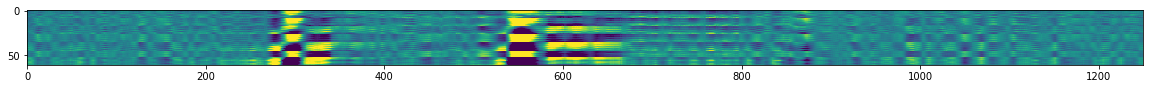

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(means, vmin=plt_vmin, vmax=plt_vmax)

In [37]:
stds = np.std(pp_and_pnp_stacked, axis=0)

In [38]:
plt_vmin = np.percentile(stds, 5)
plt_vmax = np.percentile(stds, 95)

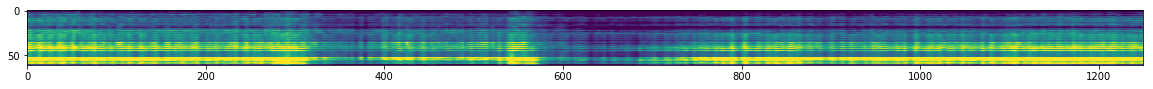

In [39]:
plt.figure(figsize=(20,20))
plt.imshow(stds,vmin=plt_vmin, vmax=plt_vmax)

In [40]:
labels = [1] * pp_train_len + [0] * pnp_train_len
test_labels = [test_label] * len(test)

It's time to learn

In [41]:
from sklearn import neighbors, svm
from sklearn.model_selection import train_test_split

In [42]:
knn = neighbors.KNeighborsClassifier(n_neighbors=130)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.05)

In [44]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=130, p=2,
                     weights='uniform')

In [45]:
knn.score(x_train, y_train)

0.5

In [46]:
knn.score(x_test, y_test)

0.5625

In [47]:
knn.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
np.count_nonzero(knn.predict(test) == test_labels)/len(test)

0.0

### Cross validation

In [49]:
def classify_knn_with_xvalid(data_pp_bp, data_pnp_bp, n_neighbours, selected_channels, test_index, mul, verbose=True):
    
    data_bp = np.concatenate((data_pp_bp, data_pnp_bp))
    
    test_is_pp, test_label = test_setup(test_index, len(data_pp_bp))
    test_p, train_p = get_train_test(data_bp, test_index)
    train_p_separated = np.vstack(train_p)
    pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
    
    train = ravel_all_trials(train_p_separated, selected_channels) * mul
    test = ravel_all_trials(test_p, selected_channels) * mul
    
    labels = [1] * pp_train_len + [0] * pnp_train_len
    test_labels = [test_label] * len(test)
    
    if verbose:
        print('Test index', test_index, 'Preparing to classify set of', pp_train_len, 'PP and', pnp_train_len, 'PNP.')
    
    clas = neighbors.KNeighborsClassifier(n_neighbors=n_neighbours)
    clas.fit(train, labels)
    train_acc = clas.score(train, labels)
    test_acc = clas.score(test, test_labels)
    
    if verbose:
        print('Train score:', train_acc, '  Test score:', test_acc)
    
    return test_acc
    
    

In [50]:
classify_knn_with_xvalid(pp_rh, pnp_rh, 23, [0, 3, 10, 36], 2, 10000000000000)

Test index 2 Preparing to classify set of 469 PP and 472 PNP.
Train score: 0.5015940488841658   Test score: 0.01694915254237288


0.01694915254237288

#### Cross validate over the whole dataset

In [51]:
total_score = 0
patients_correct = 0
for i in range(len(pp_and_pnp_bp)):
    score = classify_knn_with_xvalid(pp_rh, pnp_rh, 11, [36], i, mul)
    total_score += score
    if score > 0.5:
        patients_correct += 1
    
# TODO log acc for each patient
    
print(total_score/len(pp_and_pnp_bp))
print('Correctly labeled', patients_correct, 'out of', len(pp_and_pnp_bp))

Test index 0 Preparing to classify set of 471 PP and 472 PNP.
Train score: 0.5164369034994698   Test score: 0.0
Test index 1 Preparing to classify set of 469 PP and 472 PNP.
Train score: 0.5217853347502657   Test score: 0.0
Test index 2 Preparing to classify set of 469 PP and 472 PNP.
Train score: 0.5026567481402763   Test score: 0.288135593220339
Test index 3 Preparing to classify set of 477 PP and 472 PNP.
Train score: 0.5173867228661749   Test score: 0.0
Test index 4 Preparing to classify set of 476 PP and 472 PNP.
Train score: 0.5242616033755274   Test score: 0.0
Test index 5 Preparing to classify set of 471 PP and 472 PNP.
Train score: 0.5302226935312832   Test score: 0.0
Test index 6 Preparing to classify set of 473 PP and 472 PNP.
Train score: 0.5238095238095238   Test score: 0.0
Test index 7 Preparing to classify set of 496 PP and 472 PNP.
Train score: 0.5103305785123967   Test score: 0.0
Test index 8 Preparing to classify set of 476 PP and 472 PNP.
Train score: 0.5253164556962

#### Cross validate over multiple channels

In [52]:
file = open('all_results/eeg_knn_results.csv', 'a', newline='')
name = 'Raw EEG + KNN'
notes = 'k='

previous_channels = []
k = 3

max_acc = {'index': 0, 'value': 0}
for channel in range(61):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_knn_with_xvalid(pp_rh, pnp_rh, k, [channel], i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(channel, avg_score, correct_patients)
    
    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(previous_channels + [channel]), notes + str(k))
    
    if avg_score > max_acc['value']:
        max_acc['index'] = channel
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0 0.48689381374863955 9
1 0.47261012271285535 11
2 0.4147816947453971 8
3 0.48248467936081896 9
4 0.492738818106271 9
5 0.5119536636245293 9
6 0.4673004200397773 8
7 0.4991387177744964 8
8 0.5302976240729879 10
9 0.50407801009277 10
10 0.4143470062773695 9
11 0.4330822301324621 7
12 0.44165283488992574 9
13 0.5034870544980321 9
14 0.4837304538869535 9
15 0.4710788110878241 8
16 0.4957765024383711 9
17 0.5075368625968194 11
18 0.4460287716056655 8
19 0.4572696559063674 8
20 0.4790083279724657 9
21 0.47558277009149724 9
22 0.4954290570390889 9
23 0.51106423209795 9
24 0.4642292993159662 9
25 0.5421045613974232 12
26 0.5411656383658578 10
27 0.5064405360325065 10
28 0.46706371254560236 9
29 0.4876762265513974 10
30 0.4309259462696497 8
31 0.5093207766919462 9
32 0.4874579557907999 9
33 0.49482618938259787 8
34 0.5171949445413817 9
35 0.48286226124689047 10
36 0.49770959671048876 9
37 0.5019277061602716 9
38 0.49882897080418087 9
39 0.5018383057455315 9
40 0.4994504720768865 9
41 0.4946042

### Cross validate over multiple n_neighbours

In [34]:
file = open('all_results/eeg_knn_results.csv', 'a', newline='')
name = 'Raw EEG + KNN'
notes = 'k='

channels = [0, 2, 11, 19, 33, 36, 37, 39, 43, 49, 50]

max_acc = {'index': 0, 'value': 0}
for n_neighbours in range(1, 200, 10):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_knn_with_xvalid(pp_rh, pnp_rh, n_neighbours, channels, i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(n_neighbours, avg_score, correct_patients)

    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(channels), notes + str(n_neighbours))

    if avg_score > max_acc['value']:
        max_acc['index'] = n_neighbours
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

1 0.5103561076237874 9
11 0.48268741533683557 9
21 0.47546833184656556 9
31 0.47368421052631576 9


KeyboardInterrupt: 

In [35]:
file.close()

### SVM

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
def classify_svm_with_xvalid(data_pp_bp, data_pnp_bp, nu, selected_channels, test_index, mul, verbose=True):
    
    data_bp = np.concatenate((data_pp_bp, data_pnp_bp))
    
    test_is_pp, test_label = test_setup(test_index, len(data_pp_bp))
    test_p, train_p = get_train_test(data_bp, test_index)
    train_p_separated = np.vstack(train_p)
    pp_train_len, pnp_train_len = get_pp_pnp_length(pp_count, pnp_count, len(test_p), test_is_pp)
    
    train = ravel_all_trials(train_p_separated, selected_channels) * mul
    test = ravel_all_trials(test_p, selected_channels) * mul
    
    labels = [1] * pp_train_len + [0] * pnp_train_len
    test_labels = [test_label] * len(test)
    
    if verbose:
        print('Test index', test_index, 'Preparing to classify set of', pp_train_len, 'PP and', pnp_train_len, 'PNP.')
    
    clas = svm.NuSVC(nu=nu, kernel='linear')
    clas.fit(train, labels)
    train_acc = clas.score(train, labels)
    test_acc = clas.score(test, test_labels)
    
    if verbose:
        print('Train score:', train_acc, '  Test score:', test_acc)
    
    return test_acc
    

In [54]:
total_score = 0
patients_correct = 0
for i in range(len(pp_and_pnp_bp)):
    score = classify_svm_with_xvalid(pp_rh, pnp_rh, 0.7, [2, 26], i, mul)
    total_score += score
    if score > 0.5:
        patients_correct += 1
    

print(total_score/len(pp_and_pnp_bp))
print('Correctly labeled', patients_correct, 'out of', len(pp_and_pnp_bp))

Test index 0 Preparing to classify set of 471 PP and 472 PNP.
Train score: 0.8589607635206787   Test score: 0.6140350877192983
Test index 1 Preparing to classify set of 469 PP and 472 PNP.
Train score: 0.8660998937300743   Test score: 0.8813559322033898
Test index 2 Preparing to classify set of 469 PP and 472 PNP.
Train score: 0.8682252922422954   Test score: 0.7457627118644068
Test index 3 Preparing to classify set of 477 PP and 472 PNP.
Train score: 0.863013698630137   Test score: 0.49019607843137253
Test index 4 Preparing to classify set of 476 PP and 472 PNP.
Train score: 0.8649789029535865   Test score: 0.7884615384615384
Test index 5 Preparing to classify set of 471 PP and 472 PNP.
Train score: 0.8663838812301167   Test score: 0.631578947368421
Test index 6 Preparing to classify set of 473 PP and 472 PNP.
Train score: 0.8582010582010582   Test score: 0.6909090909090909
Test index 7 Preparing to classify set of 496 PP and 472 PNP.
Train score: 0.8760330578512396   Test score: 0.40

In [ ]:
file = open('all_results/eeg_svm_results.csv', 'a', newline='')
name = 'Raw EEG + SVM'
notes = 'nu='

previous_channels = []
nu = 0.7

max_acc = {'index': 0, 'value': 0}
for channel in range(61)[37:]:    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_svm_with_xvalid(pp_rh, pnp_rh, nu, previous_channels + [channel], i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(channel, avg_score, correct_patients)

    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(previous_channels + [channel]), notes + str(nu))    
    
    if avg_score > max_acc['value']:
        max_acc['index'] = channel
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0 0.594006721434017 14
1 0.5649117440053197 13
2 0.6044403802081719 14
3 0.46417658783733523 9
4 0.43878808896105 5
5 0.4714220753458506 7
6 0.45156163826786017 9
7 0.5881126305966559 12
8 0.5508995809466694 11
9 0.49609618393412663 9
10 0.4977347170378781 9
11 0.47257548672895394 7
12 0.4187076246054545 5
13 0.37370249108163184 3
14 0.4603437350549827 5
15 0.4585831456260845 6
16 0.5258980321393074 11
17 0.5279779581290484 11
18 0.6038808297930052 15
19 0.5716465641746759 12
20 0.5494417990929998 13
21 0.4981285634288378 7
22 0.4621434814399771 8
23 0.4693804449068193 8
24 0.4244195796901219 6
25 0.5730059894933197 14
26 0.5383771877355977 12
27 0.4113810690220257 2
28 0.4083260373980428 2
29 0.40077185916865865 2
30 0.40928373696823966 4
31 0.3910065666981357 3
32 0.43960394384320434 8
33 0.44055015216060783 6
34 0.47186107283563383 8
35 0.5218673361330793 10


In [58]:
file = open('all_results/eeg_svm_results.csv', 'a', newline='')
name = 'Raw EEG + SVM'
notes = 'nu='

channels = [4]

max_acc = {'index': 0, 'value': 0}
for nu in np.arange(0.1, 0.8, 0.1):    
    total_score = 0
    correct_patients = 0
    for i in range(len(pp_and_pnp_bp)):
        score = classify_svm_with_xvalid(pp_rh, pnp_rh, nu, channels, i, mul, verbose=False)
        total_score += score
        if score > 0.5:
            correct_patients += 1
        
    avg_score = total_score/len(pp_and_pnp_bp)
    print(nu, avg_score, correct_patients)
    
    log_result(file, name, avg_score, correct_patients, len(pp_and_pnp_bp), 'RH', str(channels), notes + str(nu))    
    
    if avg_score > max_acc['value']:
        max_acc['index'] = nu
        max_acc['value'] = avg_score
        
print('Max accuracy:', max_acc['index'], max_acc['value'])

0.1 0.46270517349983775 9
0.2 0.43512826068102156 8
0.30000000000000004 0.5148066385595179 10
0.4 0.4867335673892686 9
0.5 0.5234396765127315 11
0.6 0.5713423058445385 11
0.7000000000000001 0.612085582398378 12
Max accuracy: 0.7000000000000001 0.612085582398378
